### MISSION: You are given two clusters with the blob function below. Find the points from each cluster that are closest to the points of the other cluster. Find the first-closest and second-closest intra-cluster distance points (this will result in three or four points)

In [589]:
from sklearn.datasets.samples_generator import make_blobs
x_var, y_var = make_blobs(n_samples = 100, centers=2, 
                  cluster_std = .7,random_state=61)

In [590]:
x_var[:10]

array([[ 7.81623205,  0.45089418],
       [ 6.8104245 , -7.11425856],
       [ 6.06956576, -6.20487983],
       [ 7.19116517, -0.39809522],
       [ 5.34662669, -6.47055642],
       [ 7.30019563, -0.02821838],
       [ 6.56349901, -1.25141465],
       [ 6.46031579, -7.17658948],
       [ 7.00445839,  0.05041945],
       [ 8.60296541,  0.42834276]])

In [591]:
x_var[:,0][:20]

array([ 7.81623205,  6.8104245 ,  6.06956576,  7.19116517,  5.34662669,
        7.30019563,  6.56349901,  6.46031579,  7.00445839,  8.60296541,
        6.71355827,  6.8389486 ,  6.35601614,  7.8804355 ,  7.06073236,
        5.75885886,  7.34326255,  7.22384241,  7.14608069,  5.97134256])

In [592]:
x_var[:,1][:20]

array([ 0.45089418, -7.11425856, -6.20487983, -0.39809522, -6.47055642,
       -0.02821838, -1.25141465, -7.17658948,  0.05041945,  0.42834276,
       -5.88974584, -5.98999063,  0.18074668, -0.7969246 , -0.66474029,
       -7.27174311, -0.56013564,  1.06194636, -0.56539177, -6.67269919])

---

---

In [593]:
data = pd.DataFrame(zip(x_var[:,0],x_var[:,1],y_var))
data[:10]

,0,1,2
0,7.816232,0.450894,1
1,6.810424,-7.114259,0
2,6.069566,-6.204880,0
3,7.191165,-0.398095,1
4,5.346627,-6.470556,0
5,7.300196,-0.028218,1
6,6.563499,-1.251415,1
7,6.460316,-7.176589,0
8,7.004458,0.050419,1
9,8.602965,0.428343,1


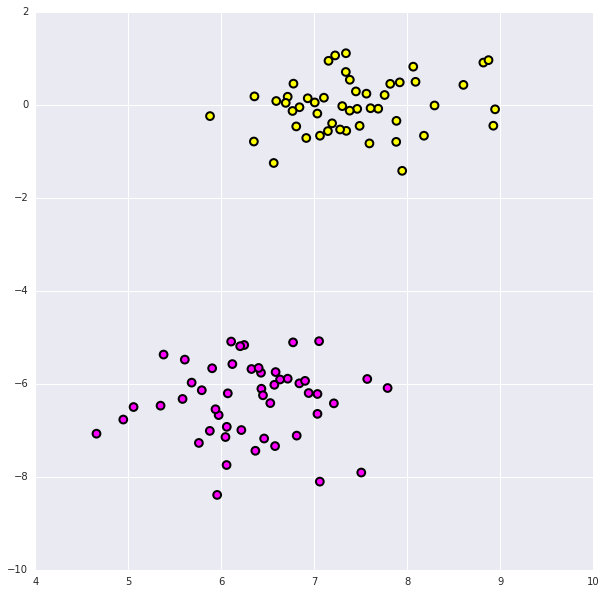

In [594]:
plt.rcParams['figure.figsize'] = (10,10)
plt.scatter(data[0],data[1],c=data[2],cmap = 'spring',s=60,linewidth=2)
plt.show()

In [595]:
group_0 = data[data[2]==0]
group_1 = data[data[2]==1]

In [596]:
group_1[:10]

,0,1,2
0,7.816232,0.450894,1
3,7.191165,-0.398095,1
5,7.300196,-0.028218,1
6,6.563499,-1.251415,1
8,7.004458,0.050419,1
9,8.602965,0.428343,1
12,6.356016,0.180747,1
13,7.880436,-0.796925,1
14,7.060732,-0.664740,1
16,7.343263,-0.560136,1


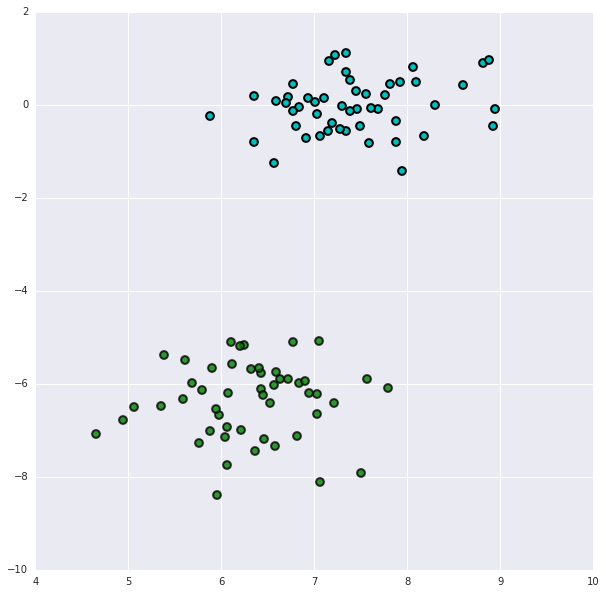

In [597]:
plt.scatter(group_0[0],group_0[1],c = 'g',s=60,alpha=.8,linewidth=2)
plt.scatter(group_1[0],group_1[1],c = 'c',s=60,linewidth=2)
plt.show()

---

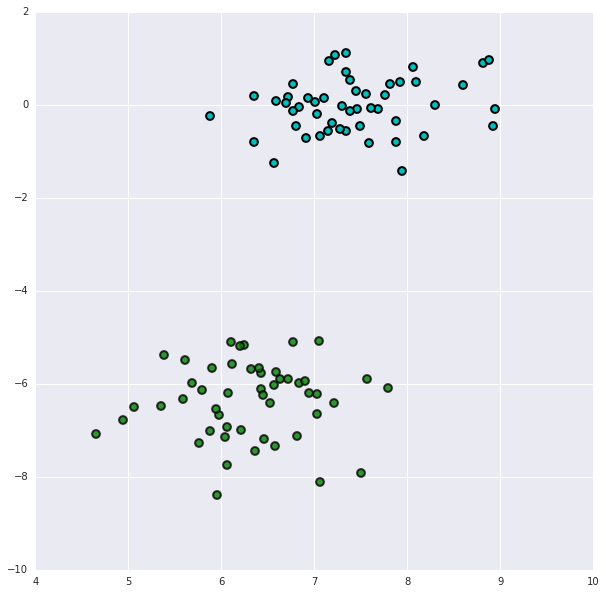

In [598]:
plt.rcParams['figure.figsize'] = (10,10)

plt.scatter(group_0[0],group_0[1],c = 'g',s=60,alpha=.8,linewidth=2)
plt.scatter(group_1[0],group_1[1],c = 'c',s=60,linewidth=2)

plt.show()

## THE CLOSEST POINTS TO THE POINTS OF ANOTHER CLUSTER

In [599]:
def find_distance(x0,x1,y0,y1):
    return math.sqrt(((y0-x0)**2)+((y1-x1)**2))

In [600]:
g1_low_dist = []

for x in group_0.values:
    for y in group_1.values:
        x0 = x[0]
        x1 = x[1]
        y0 = y[0]
        y1 = y[1]        
        dist_id = [find_distance(x0,x1,y0,y1),[x0,x1],[y0,y1]]
        g1_low_dist.append(dist_id)

print(sorted(g1_low_dist,reverse=False)[0])
print('')
print(sorted(g1_low_dist,reverse=False)[1])

[3.7711337760773365, [7.0512321802490323, -5.083614450108894], [7.9446139834936442, -1.4198296705806648]]

[3.862872817988849, [6.7714277468235622, -5.1086872713714904], [6.5634990128187161, -1.251414653376717]]


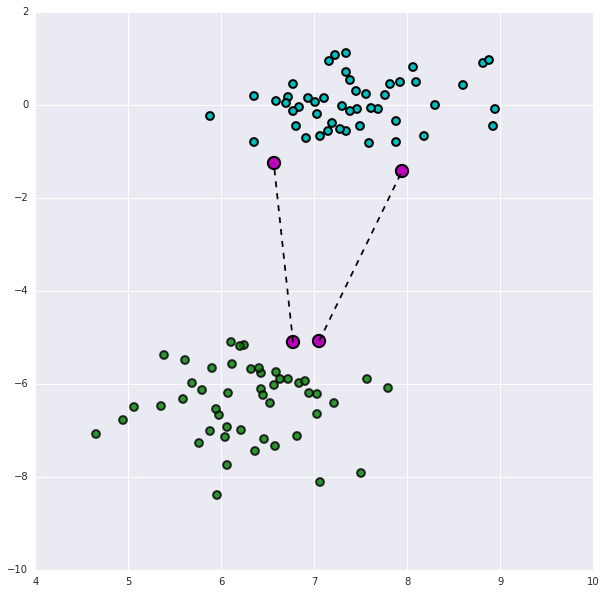

In [608]:
plt.rcParams['figure.figsize'] = (10,10)

plt.scatter(group_0[0],group_0[1],c = 'g',s=60,alpha=.8,linewidth=2)
plt.scatter(group_1[0],group_1[1],c = 'c',s=60,linewidth=2)

x1 = sorted(g1_low_dist,reverse=False)[0][1][0]
y1 = sorted(g1_low_dist,reverse=False)[0][1][1]
x2 = sorted(g1_low_dist,reverse=False)[0][2][0]
y2 = sorted(g1_low_dist,reverse=False)[0][2][1]

plt.scatter([x1,x2],[y1,y2],color='m',s = 150,edgecolors='k',linewidth=2)
plt.plot([x1,x2],[y1,y2],color='k',linestyle='dashed')

x1 = sorted(g1_low_dist,reverse=False)[1][1][0]
y1 = sorted(g1_low_dist,reverse=False)[1][1][1]
x2 = sorted(g1_low_dist,reverse=False)[1][2][0]
y2 = sorted(g1_low_dist,reverse=False)[1][2][1]

plt.scatter([x1,x2],[y1,y2],color='m',s = 150,edgecolors='k',linewidth=2)
plt.plot([x1,x2],[y1,y2],color='k',linestyle='dashed')

plt.show()

In [602]:
print(sorted(g1_low_dist,reverse=False)[0])
print('')
print(sorted(g1_low_dist,reverse=False)[1])

[3.7711337760773365, [7.0512321802490323, -5.083614450108894], [7.9446139834936442, -1.4198296705806648]]

[3.862872817988849, [6.7714277468235622, -5.1086872713714904], [6.5634990128187161, -1.251414653376717]]


----

In [565]:
from __future__ import division
import numpy as np
import seaborn as sns; sns.set()
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math

pd.options.mode.chained_assignment = None

---